In [1]:
%pylab notebook
import requests
import time

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [26]:
req = requests.get('https://app-prod-ws.meteoswiss-app.ch/v1/plzDetail', {'plz': 1202 * 100})
print(req)

dat = req.json()

<Response [200]>


In [3]:
req.url

'https://app-prod-ws.meteoswiss-app.ch/v1/plzDetail?plz=120200'

In [4]:
time.time()

1723925907.9376996

In [5]:
dat['graph'].keys()

dict_keys(['start', 'startLowResolution', 'precipitation10m', 'precipitationMin10m', 'precipitationMax10m', 'weatherIcon3h', 'weatherIcon3hV2', 'windDirection3h', 'windSpeed3h', 'sunrise', 'sunset', 'temperatureMin1h', 'temperatureMax1h', 'temperatureMean1h', 'precipitation1h', 'precipitationMin1h', 'precipitationMax1h'])

In [6]:
start = dat['graph']['start']
sunrise = dat['graph']['sunrise']
sunrise

[1723869439983,
 1723955915508,
 1724042391062,
 1724128866635,
 1724215342232,
 1724301817850]

In [7]:
dat['graph']['weatherIcon3h']

[114,
 135,
 3,
 2,
 3,
 2,
 14,
 114,
 120,
 117,
 17,
 17,
 14,
 35,
 35,
 135,
 135,
 135,
 3,
 2,
 2,
 1,
 1,
 101,
 101,
 101,
 1,
 1,
 1,
 1,
 1,
 101,
 102,
 102,
 1,
 1,
 2,
 2,
 2,
 101,
 101,
 102,
 2,
 1,
 1,
 1,
 1,
 101]

<IPython.core.display.Javascript object>


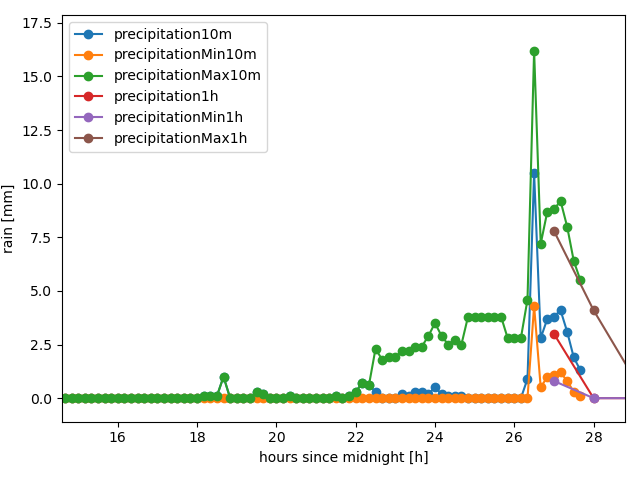

In [40]:
close()
x = arange(len(dat['graph']['precipitation10m'])) * 10 / 60
for l in ['precipitation10m', 'precipitationMin10m', 'precipitationMax10m']:
    plot(x, dat['graph'][l], '-o', label=l)
    
start = dat['graph']['start'] / 1000
start_l = dat['graph']['startLowResolution'] / 1000
offs = (start_l - start) / 60 / 60
x = arange(len(dat['graph']['precipitation1h'])) + offs
for l in ['precipitation1h', 'precipitationMin1h', 'precipitationMax1h']:
    plot(x, dat['graph'][l], '-o', label=l)
    
xlabel('hours since midnight [h]')
ylabel('rain [mm]')
legend()
tight_layout()

In [42]:
offs

27.0

/tmp/ipykernel_189756/4031584845.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  close()


<IPython.core.display.Javascript object>


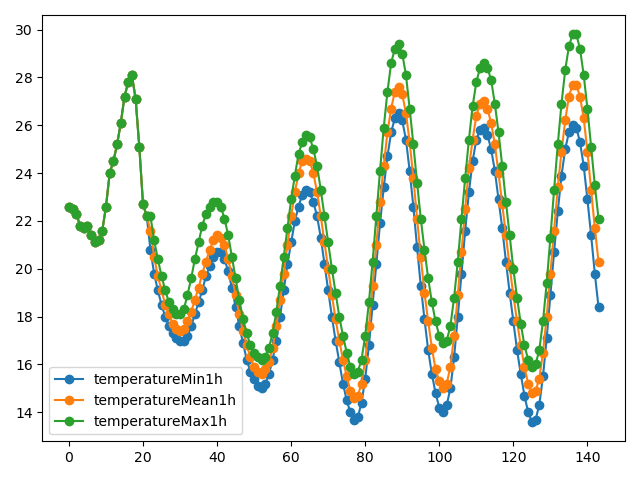

In [32]:
close()
for l in ['temperatureMin1h', 'temperatureMean1h', 'temperatureMax1h']:
    y = dat['graph'][l]
    plot(y, '-o', label=l)
legend()
tight_layout()

In [27]:
print(datetime.datetime.fromtimestamp(dat['graph']['start'] / 1000))

2024-08-17 00:00:00


In [28]:
len(dat['graph']['precipitation10m']) * 10 / 60

27.833333333333332

In [29]:
print(datetime.datetime.fromtimestamp(dat['graph']['startLowResolution'] / 1000))

2024-08-18 03:00:00


In [30]:
len(dat['graph']['precipitation1h']) / 24

4.875

In [31]:
len(dat['graph']['temperatureMean1h']) / 24

6.0